# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Loading the Dataset

In [5]:
df = pd.read_csv('online_shoppers_intention.csv')

# Data Exploration

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,6,1156.500000,0.000000,0.033333,0.000000,0.0,Nov,2,2,1,20,Returning_Visitor,False,False
1,4,52.000000,1,7.0,46,3087.000000,0.003774,0.021384,16.946438,0.0,Mar,2,2,3,8,Returning_Visitor,False,True
2,4,106.500000,0,0.0,12,806.250000,0.012500,0.029167,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
3,9,497.166667,0,0.0,20,1170.166667,0.012121,0.023485,0.000000,0.0,Nov,3,2,3,2,Returning_Visitor,False,False
4,0,0.000000,0,0.0,3,17.000000,0.000000,0.033333,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,False,False


In [7]:
df.shape

(12330, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

# Missing Values Check

In [10]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


# Duplicate value Check and Removal

In [11]:
df.duplicated().sum()

np.int64(125)

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(12205, 18)

# Data Preprocessing

## Data Conversion

In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [15]:
df['weekend']=df['Weekend'].astype(int)
df['Revenue']=df['Revenue'].astype(int)

## One-Hot Encoding Categorical Variables

In [16]:
df=pd.get_dummies(df,columns=['Month','VisitorType'],drop_first=True)

In [17]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.000000,0,0.0,6,1156.500000,0.000000,0.033333,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,True
1,4,52.000000,1,7.0,46,3087.000000,0.003774,0.021384,16.946438,0.0,...,False,False,False,True,False,False,False,False,False,True
2,4,106.500000,0,0.0,12,806.250000,0.012500,0.029167,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
3,9,497.166667,0,0.0,20,1170.166667,0.012121,0.023485,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,True
4,0,0.000000,0,0.0,3,17.000000,0.000000,0.033333,0.000000,0.0,...,False,False,False,True,False,False,False,False,False,True


# Data Spliting

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Standardization

In [19]:
scaler = StandardScaler()
num_cols = df.drop('Revenue',axis=1).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop('Revenue')

df[num_cols] = scaler.fit_transform(df[num_cols])

In [21]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Class Distribution

In [22]:
df['Revenue'].value_counts(normalize=True)

,proportion
Revenue,
0,0.843671
1,0.156329


# Exploratory Data Analysis (EDA)

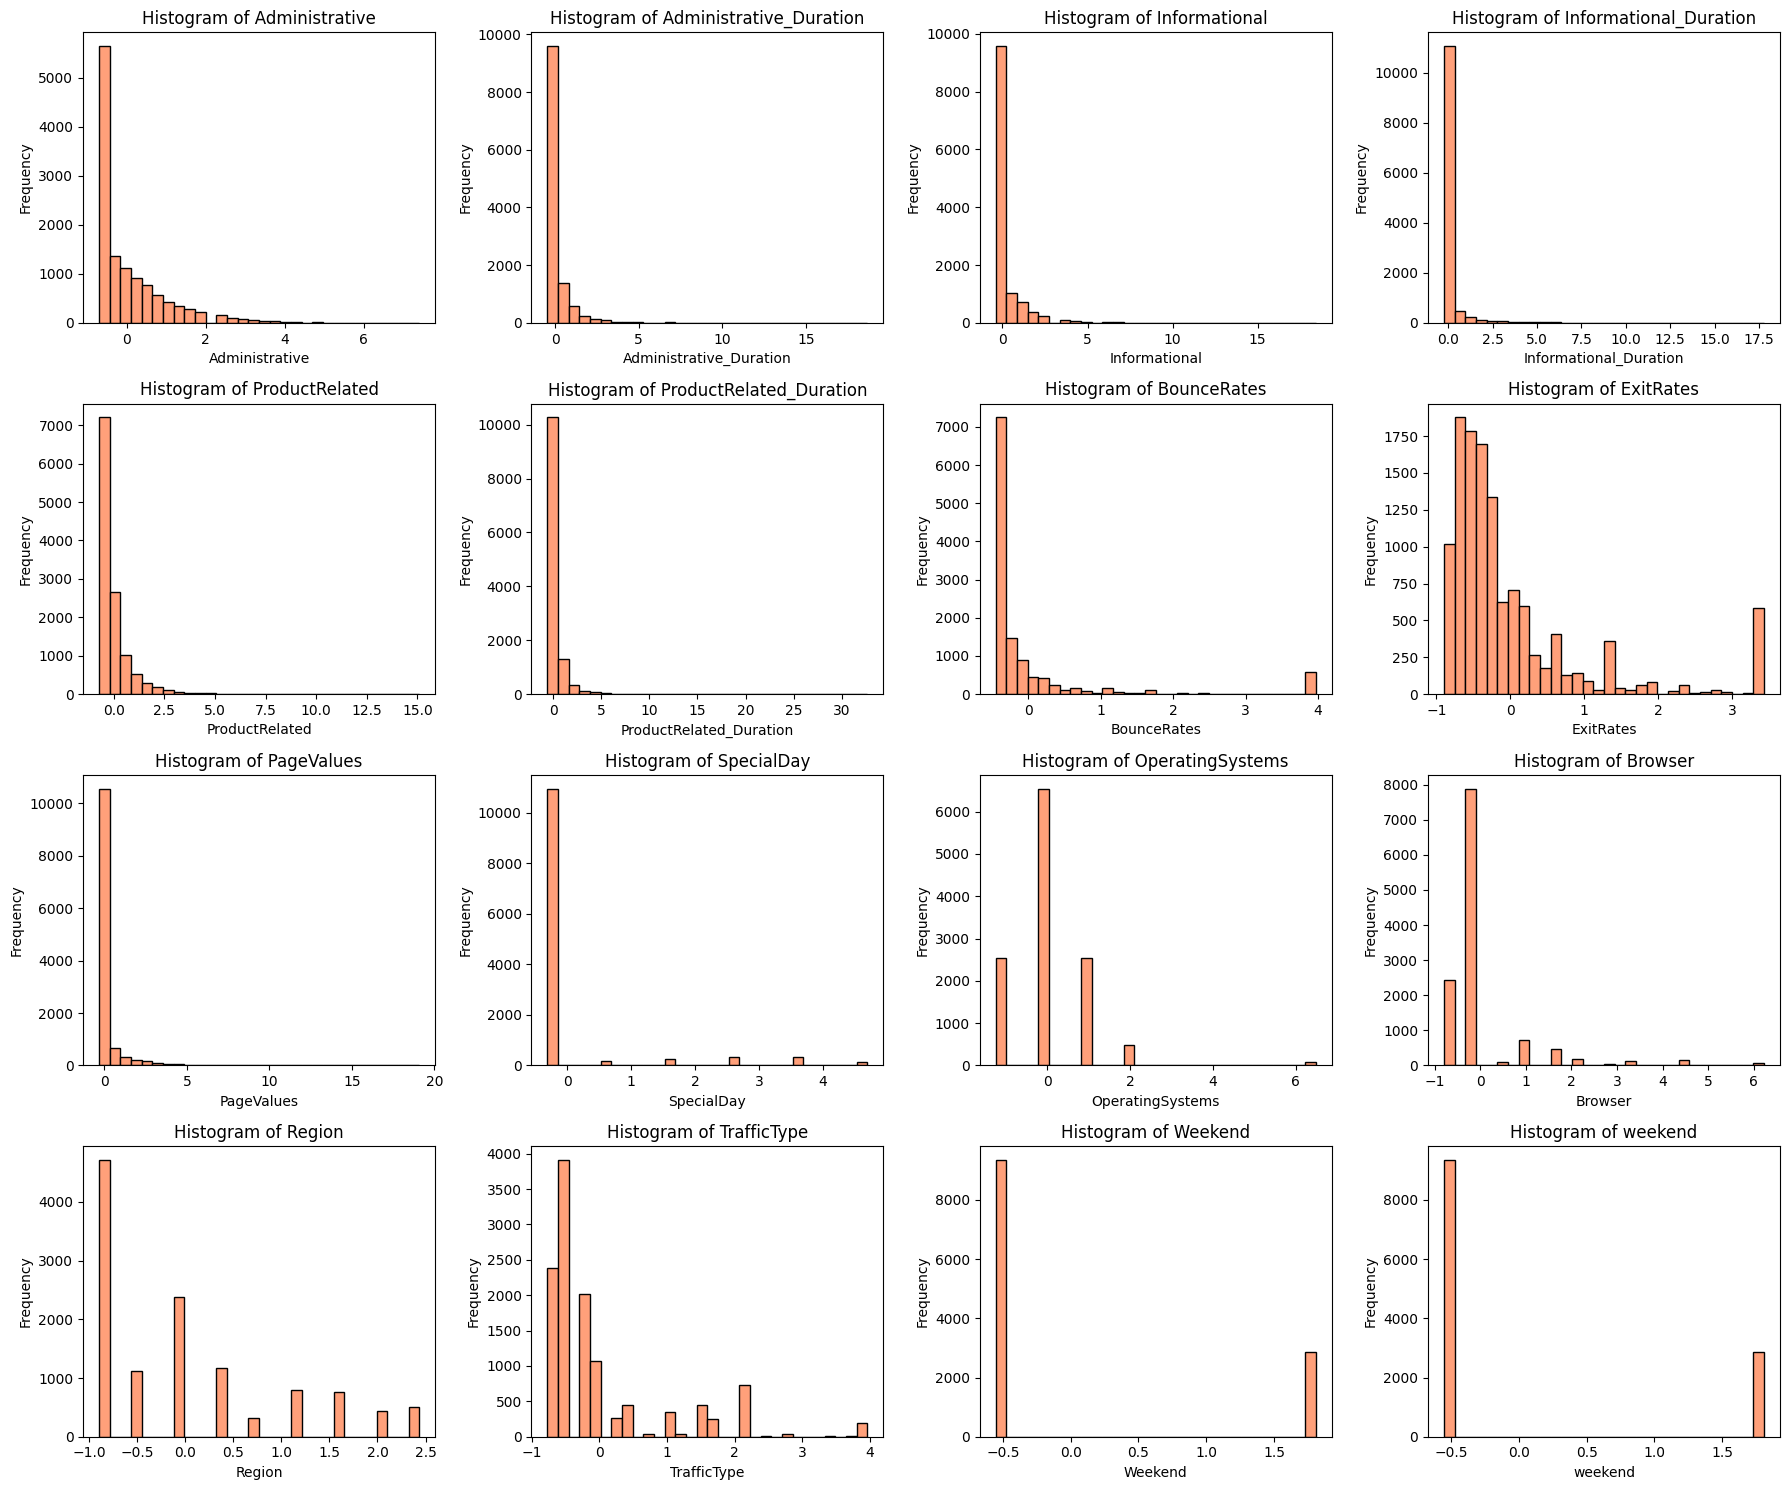

In [23]:
fig, axes = plt.subplots(4, 4, figsize=(18, 15))

axes = axes.flatten()

for i, column in enumerate(num_cols):
    if i < len(axes):
        axes[i].hist(df[column], bins=30, color='lightsalmon', edgecolor='black')
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
    else:
        break

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

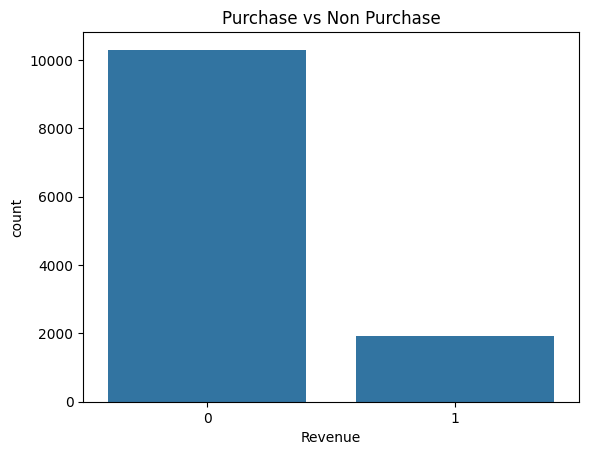

In [24]:
sns.countplot(x='Revenue',data=df)
plt.title("Purchase vs Non Purchase")
plt.show()

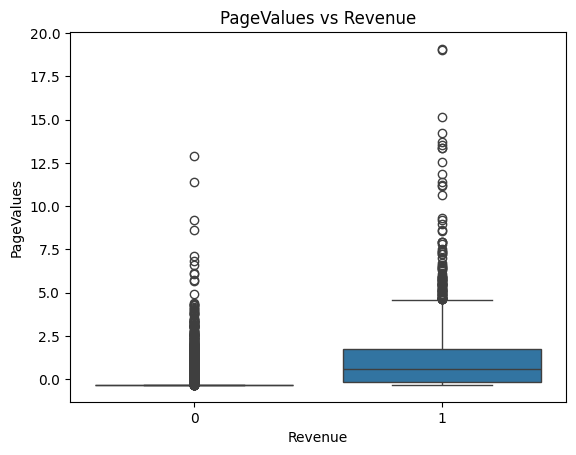

In [25]:
sns.boxplot(x='Revenue', y='PageValues', data=df)
plt.title("PageValues vs Revenue")
plt.show()

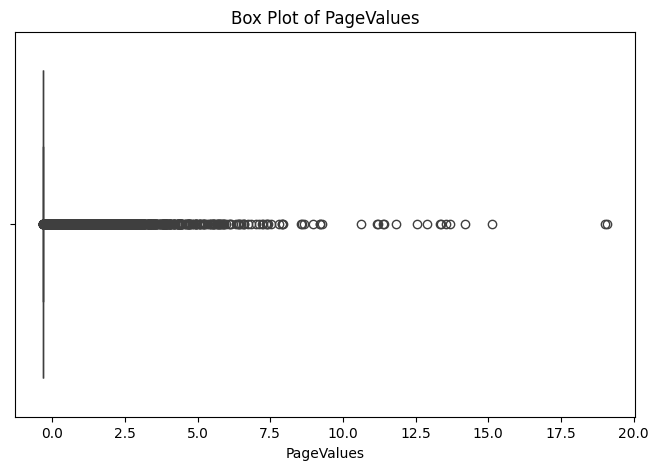

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['PageValues'])
plt.title("Box Plot of PageValues")
plt.show()

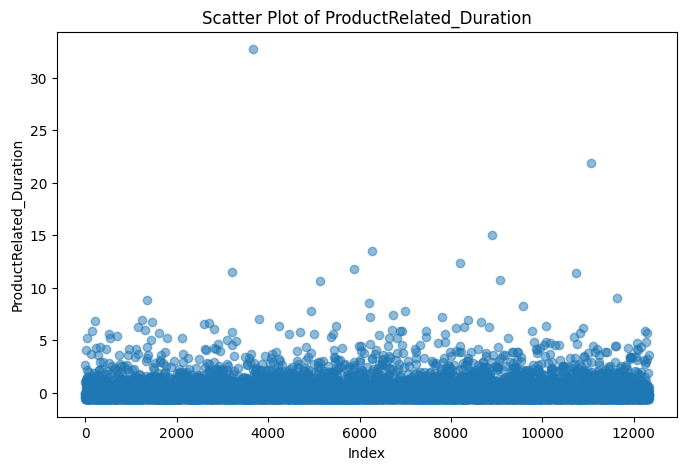

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(df.index, df['ProductRelated_Duration'], alpha=0.5)
plt.title("Scatter Plot of ProductRelated_Duration")
plt.xlabel("Index")
plt.ylabel("ProductRelated_Duration")
plt.show()

In [28]:
correlation = df.corr()['Revenue'].sort_values(ascending=False)
correlation.head(10)

,Revenue
Revenue,1.000000
PageValues,0.491894
ProductRelated,0.156042
Month_Nov,0.154274
ProductRelated_Duration,0.150077
Administrative,0.136330
Informational,0.093626
Administrative_Duration,0.091768
Informational_Duration,0.069358
Month_Oct,0.031757


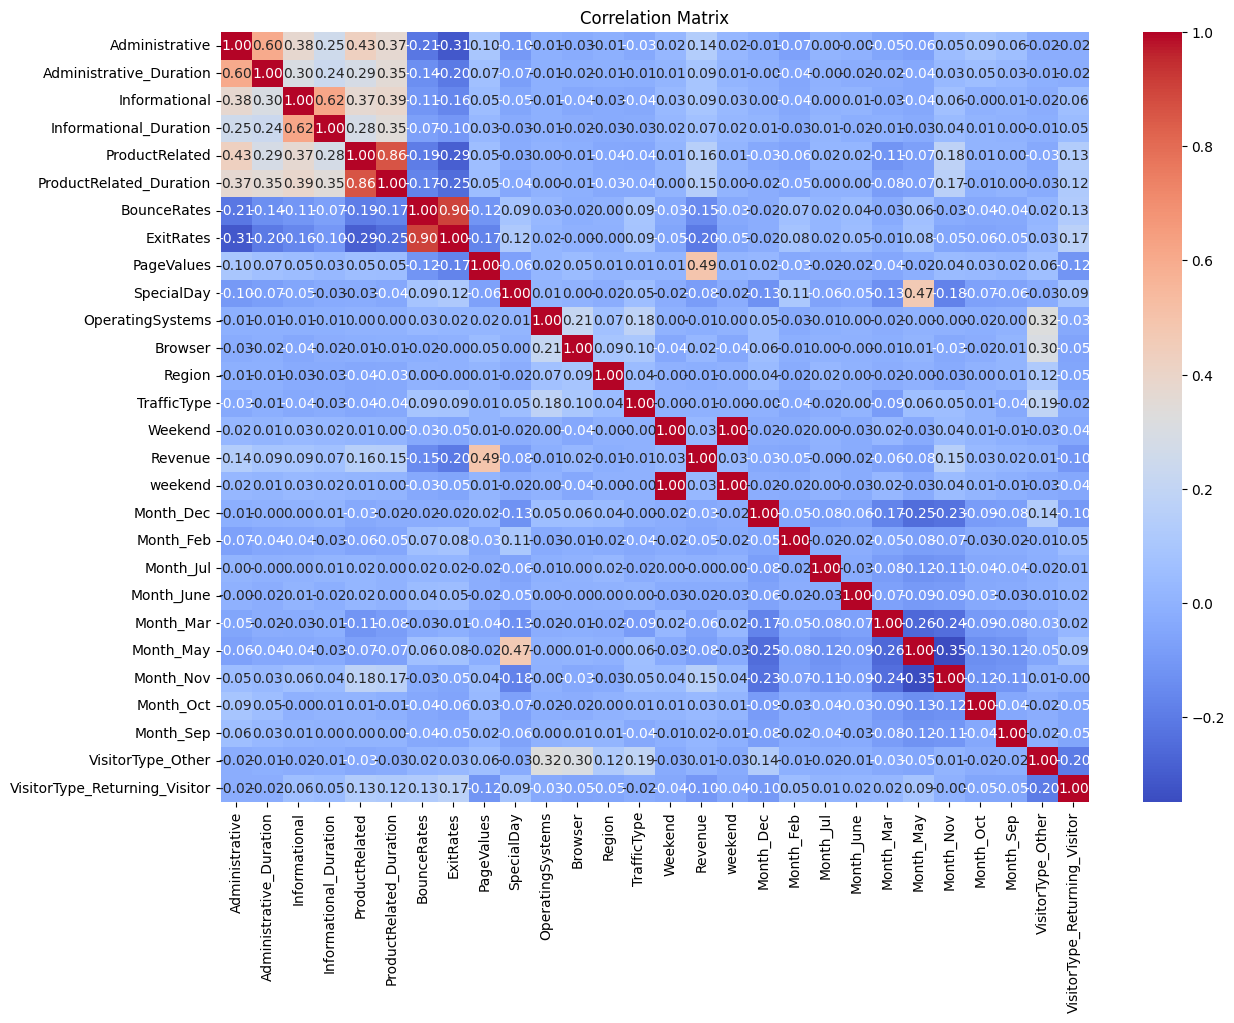

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Model Building

## Logistic Regression

### Model Training

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

In [31]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr,target_names=['not purchased','purchased']))

               precision    recall  f1-score   support

not purchased       0.90      0.98      0.93      2059
    purchased       0.75      0.39      0.51       382

     accuracy                           0.88      2441
    macro avg       0.82      0.68      0.72      2441
 weighted avg       0.87      0.88      0.87      2441



### Confusion Matrix

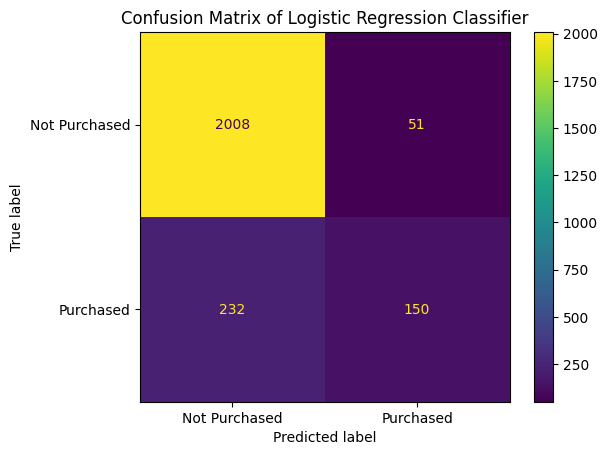

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_matrix = confusion_matrix(y_test,y_pred_lr)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Purchased','Purchased'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier")
plt.show()

## Decision Tree

### Model Training

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation

In [34]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt,target_names=['not purchased','purchased']))

               precision    recall  f1-score   support

not purchased       0.93      0.92      0.92      2059
    purchased       0.57      0.61      0.59       382

     accuracy                           0.87      2441
    macro avg       0.75      0.76      0.75      2441
 weighted avg       0.87      0.87      0.87      2441



### Confusion Matrix

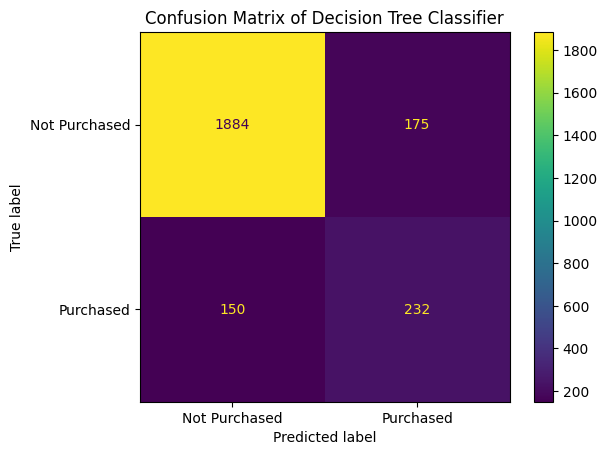

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_matrix = confusion_matrix(y_test,y_pred_dt)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Purchased','Purchased'])
cm_display.plot()
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()

## Random Forest

### Model Training

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

In [37]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf,target_names=['not purchased','purchased']))

               precision    recall  f1-score   support

not purchased       0.92      0.96      0.94      2059
    purchased       0.74      0.57      0.64       382

     accuracy                           0.90      2441
    macro avg       0.83      0.76      0.79      2441
 weighted avg       0.89      0.90      0.89      2441



###confusion Matrix

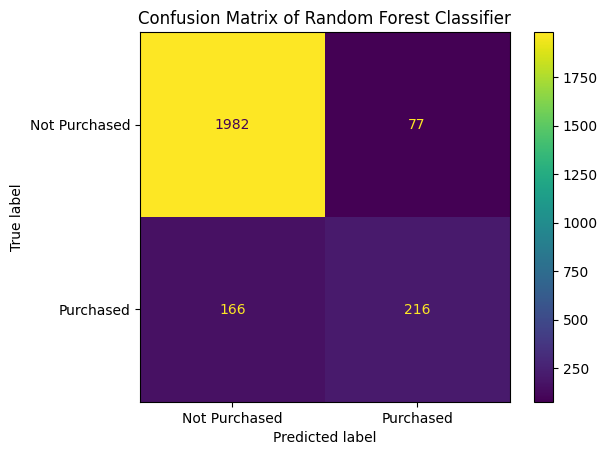

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_matrix = confusion_matrix(y_test,y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Purchased','Purchased'])
cm_display.plot()
plt.title("Confusion Matrix of Random Forest Classifier")
plt.show()

#Cross Validation and Hyperparameter Optimization of Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf
}
lr = LogisticRegression(
    max_iter=1000
)

lr_cv_scores = cross_val_score(
    lr,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc'
)

print("Logistic Regression CV ROC-AUC:", lr_cv_scores)
print("Mean CV ROC-AUC:", lr_cv_scores.mean())

Logistic Regression CV ROC-AUC: [0.91107817 0.90066847 0.88106995 0.88475848 0.89651328]
Mean CV ROC-AUC: 0.8948176705564883


In [40]:
from sklearn.model_selection import GridSearchCV
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

lr_grid = GridSearchCV(
    lr,
    lr_param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

lr_grid.fit(X_train, y_train)

print("Best LR params:", lr_grid.best_params_)
print("Best LR CV ROC-AUC:", lr_grid.best_score_)

Best LR params: {'C': 0.1, 'penalty': 'l2'}
Best LR CV ROC-AUC: 0.8950420284353104


#Cross Validation and Hyperparameter Optimization of Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

dt_cv_scores = cross_val_score(
    dt,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc'
)

print("Decision Tree CV ROC-AUC:", dt_cv_scores)
print("Mean CV ROC-AUC:", dt_cv_scores.mean())

Decision Tree CV ROC-AUC: [0.746107   0.73663855 0.73493554 0.72959176 0.75179114]
Mean CV ROC-AUC: 0.7398127967122267


In [42]:
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt_grid = GridSearchCV(
    dt,
    dt_param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

print("Best DT params:", dt_grid.best_params_)
print("Best DT CV ROC-AUC:", dt_grid.best_score_)

Best DT params: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best DT CV ROC-AUC: 0.9148367062876144


#Cross Validation and Hyperparameter Optimization of Random Forest

In [43]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_cv_scores = cross_val_score(
    models["Random Forest"],
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc'
)

print("Random Forest CV ROC-AUC scores:", rf_cv_scores)
print("Mean CV ROC-AUC:", rf_cv_scores.mean())

Random Forest CV ROC-AUC scores: [0.92794981 0.91711364 0.91794326 0.92383913 0.91852748]
Mean CV ROC-AUC: 0.9210746626764337


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(
        class_weight='balanced',
        random_state=42
    ),
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best parameters:", rf_grid.best_params_)
print("Best CV ROC-AUC:", rf_grid.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best CV ROC-AUC: 0.9306160480271581


#Cross Validation Comparison

In [45]:
cv_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Mean CV ROC-AUC': [
        lr_grid.best_score_,
        dt_grid.best_score_,
        rf_grid.best_score_
    ]
}).sort_values(by='Mean CV ROC-AUC', ascending=False)

cv_summary

,Model,Mean CV ROC-AUC
2,Random Forest,0.930616
1,Decision Tree,0.914837
0,Logistic Regression,0.895042


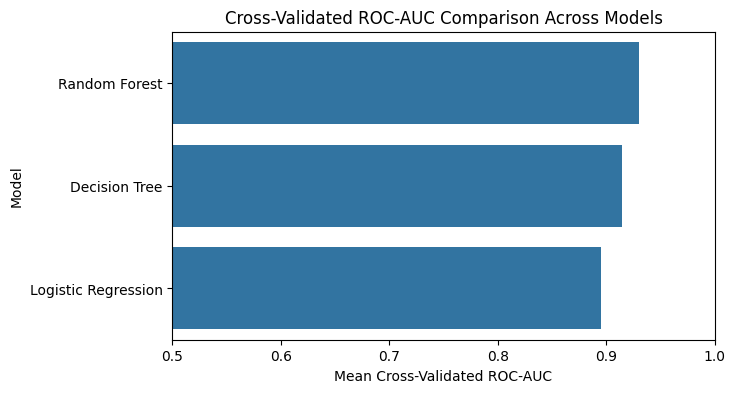

In [46]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=cv_summary,
    x='Mean CV ROC-AUC',
    y='Model',
    orient='h'
)

plt.xlabel('Mean Cross-Validated ROC-AUC')
plt.ylabel('Model')
plt.title('Cross-Validated ROC-AUC Comparison Across Models')
plt.xlim(0.5, 1.0)  # optional, makes differences clearer
plt.show()

#Model Comparison

In [47]:
models = {
    "Logistic Regression": lr_grid.best_estimator_,
    "Decision Tree": dt_grid.best_estimator_,
    "Random Forest": rf_grid.best_estimator_
}

y_prob_lr = models["Logistic Regression"].predict_proba(X_test)[:, 1]
y_prob_dt = models["Decision Tree"].predict_proba(X_test)[:, 1]
y_prob_rf = models["Random Forest"].predict_proba(X_test)[:, 1]

In [48]:
from sklearn.metrics import accuracy_score, f1_score

comparison = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    comparison.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })

comparison_df = pd.DataFrame(comparison)
comparison_df

,Model,Accuracy,F1-score
0,Logistic Regression,0.883654,0.512027
1,Decision Tree,0.829578,0.612663
2,Random Forest,0.902909,0.692607


#ROC Curve Comparison

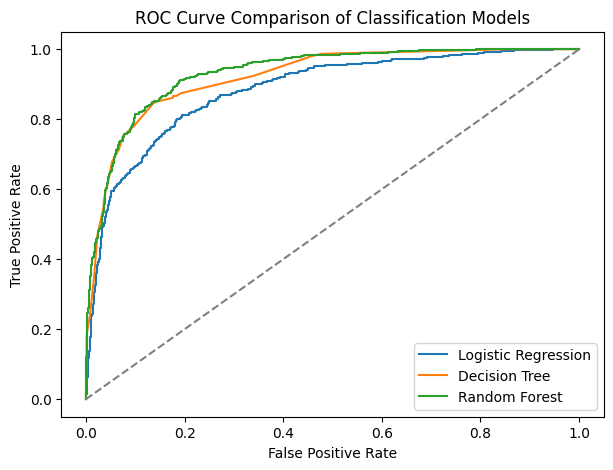

In [49]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,auc
%matplotlib inline

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(7,5))

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')

plt.plot([0,1], [0,1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Classification Models')
plt.legend()
plt.show()


In [50]:
from sklearn.metrics import roc_auc_score

auc_scores = {
    "Logistic Regression": roc_auc_score(y_test, y_prob_lr),
    "Decision Tree": roc_auc_score(y_test, y_prob_dt),
    "Random Forest": roc_auc_score(y_test, y_prob_rf),
}
auc_scores

{'Logistic Regression': np.float64(0.8831003715014406),
 'Decision Tree': np.float64(0.9205982419158387),
 'Random Forest': np.float64(0.9314794707947995)}

In [51]:
comparison_df = pd.DataFrame({
    "Model": auc_scores.keys(),
    "ROC-AUC": auc_scores.values()
}).sort_values(by="ROC-AUC", ascending=False)

comparison_df

,Model,ROC-AUC
2,Random Forest,0.931479
1,Decision Tree,0.920598
0,Logistic Regression,0.883100


In [52]:
best_model_name = comparison_df.iloc[0]['Model']
best_model_name

'Random Forest'

In [53]:
if best_model_name == 'Random Forest':
    final_model = rf_grid.best_estimator_
elif best_model_name == 'Decision Tree':
    final_model = dt_grid.best_estimator_
else:
    final_model = lr_grid.best_estimator_

#Best performing Random Forest Model

In [54]:
y_pred_best = final_model.predict(X_test)
print(classification_report(y_test, y_pred_best,target_names=['not purchased','purchased']))

               precision    recall  f1-score   support

not purchased       0.94      0.94      0.94      2059
    purchased       0.69      0.70      0.69       382

     accuracy                           0.90      2441
    macro avg       0.82      0.82      0.82      2441
 weighted avg       0.90      0.90      0.90      2441



#Model Testing and Evaluation

In [55]:
y_test_pred = final_model.predict(X_test)

if best_model_name in ['Logistic Regression', 'Decision Tree']:
    y_test_prob = final_model.predict_proba(X_test)[:, 1]
else:
    y_test_prob = final_model.predict_proba(X_test)[:, 1]

In [56]:
from sklearn.metrics import accuracy_score, roc_auc_score

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_prob))

Test Accuracy: 0.9029086439983613
Test ROC-AUC: 0.9314794707947995


In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2059
           1       0.69      0.70      0.69       382

    accuracy                           0.90      2441
   macro avg       0.82      0.82      0.82      2441
weighted avg       0.90      0.90      0.90      2441



#Key Predictors

In [58]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": final_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)

,Feature,Importance
8,PageValues,0.417656
7,ExitRates,0.090773
5,ProductRelated_Duration,0.086248
4,ProductRelated,0.061154
6,BounceRates,0.054349
1,Administrative_Duration,0.046601
0,Administrative,0.035609
22,Month_Nov,0.034551
13,TrafficType,0.024362
12,Region,0.022541


#Retraining

In [59]:
top_features = feature_importance.head(10)['Feature'].tolist()

# Get the indices of the top features from the original DataFrame's columns
feature_indices = [X.columns.get_loc(col) for col in top_features]

# Select columns using numerical indices from the NumPy arrays
X_train_top = X_train[:, feature_indices]
X_test_top = X_test[:, feature_indices]

rf_top = final_model.__class__(**final_model.get_params())
rf_top.fit(X_train_top, y_train)

y_pred_top = rf_top.predict(X_test_top)
y_prob_top = rf_top.predict_proba(X_test_top)[:, 1]

print("ROC-AUC (Top Features):",
      roc_auc_score(y_test, y_prob_top))

ROC-AUC (Top Features): 0.9257003475992258


#Model Save

In [60]:
import joblib
joblib.dump(final_model, 'best_model.pkl')

['best_model.pkl']

#Model Deployment

In [61]:
new_data = X_test[[0]] # Correct indexing for NumPy array

prediction = final_model.predict(new_data) # Use final_model
prediction

if prediction[0] == 1:
    print("Customer is likely to make a purchase")
else:
    print("Customer is unlikely to make a purchase")

Customer is unlikely to make a purchase
